## Customise plotting 

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('dark_background')

## Data encoding

Let's see the number of possible chords

In [2]:
from jl_dictionaries import Dictionaries

In [3]:
Dictionaries.get_all_possible_chords()[0:10]

['C3', 'C5', 'C', 'Cm', 'Cdim', 'Caug', 'Csus2', 'Csus4', 'C6', 'C7']

In [4]:
vocab_size = len(Dictionaries.get_all_possible_chords())
vocab_size

804

The class encoder has been created to manually convert chords (or any other categorical feature) into numbers

In [5]:
from jl_encoding import Encoder

In [6]:
encoder = Encoder(Dictionaries.get_all_possible_chords())

Category to number dictionary length: 804
Number to category dictionary length: 804


In [7]:
list(encoder.number_to_category_dict.items())[0:10]

[(1, 'C3'),
 (2, 'C5'),
 (3, 'C'),
 (4, 'Cm'),
 (5, 'Cdim'),
 (6, 'Caug'),
 (7, 'Csus2'),
 (8, 'Csus4'),
 (9, 'C6'),
 (10, 'C7')]

## Prepare data 

### Encoding 

In [8]:
from jl_song_data import SongData
from jl_constants import NUMBER_OF_NOTES
from jl_chord_parser import ChordParser

parse = ChordParser().parse

In [9]:
data = SongData('../data/all_features.csv')
df = data.df

Let's encode both chord and normalised chords

In [10]:
for column_name in ['chords', 'normalised chords']:
    df[column_name] = df[column_name].apply(eval)
    df[f'encoded {column_name}'] = df[column_name]\
        .apply(lambda chords: [parse(chord) for chord in chords])\
        .apply(lambda chords: [encoder.to_number(chord.standard_name) for chord in chords if chord is not None ] )
    

In [11]:
df[['name','chords', 'encoded chords', 'normalised chords', 'encoded normalised chords']].sample(5)

,name,chords,encoded chords,normalised chords,encoded normalised chords
2044,A Place Where You Belong (ver 2),"[Bm, G, Bm, G, Bm, G, Bm, G, Bm, G, Bm, G, Bm,...","[741, 472, 741, 472, 741, 472, 741, 472, 741, ...","[Am, F, Am, F, Am, F, Am, F, Am, F, Am, F, Am,...","[607, 338, 607, 338, 607, 338, 607, 338, 607, ..."
3691,Crocodile Rock,"[G, G, Em, Em, C, C, D, D, G, Bm, C, D, G, Bm,...","[472, 472, 272, 272, 3, 3, 137, 137, 472, 741,...","[C, C, Am, Am, F, F, G, G, C, Em, F, G, C, Em,...","[3, 3, 607, 607, 338, 338, 472, 472, 3, 272, 3..."
13865,Rainbow Connection,"[E, A, E, C#m, F#m, B, E, C#m, A, E, C#m, F#m,...","[271, 606, 271, 71, 406, 740, 271, 71, 606, 27...","[C, F, C, Am, Dm, G, C, Am, F, C, Am, Dm, G, C...","[3, 338, 3, 607, 138, 472, 3, 607, 338, 3, 607..."
437,Time Passages (ver 2),"[D, A/D, A/D, G/D, D, A, F#m7, G, D, A/D, G/D,...","[137, 606, 606, 472, 137, 606, 420, 472, 137, ...","[C, G, G, F, C, G, Em7, F, C, G, F, C, G, Em7,...","[3, 472, 472, 338, 3, 472, 286, 338, 3, 472, 3..."
12584,Angie (ver 6),"[Am, E, G, Fsus4, F, C, C, B, Am, E, G, F, C, ...","[607, 271, 472, 343, 338, 3, 3, 740, 607, 271,...","[Am, E, G, Fsus4, F, C, C, B, Am, E, G, F, C, ...","[607, 271, 472, 343, 338, 3, 3, 740, 607, 271,..."


### Padding 

According [EFFECTS OF PADDING ON LSTMS AND CNNS](https://arxiv.org/pdf/1903.07288.pdf), pre-padding is better than post-padding in LSTM

Let's create a function to add zeros at the beginning of a sequence until reaching a given length

In [12]:
def pad_sequence(input, length):
    return [0] * (length - len(input)) + input

Let's test it (it could be to a unit test...)

In [13]:
short_sequence = [encoder.to_number(chord) for chord in ['C', 'G', 'C', 'D', 'G']]
short_sequence

[3, 472, 3, 137, 472]

In [14]:
normal_sequence = list(range(10,31))
print(len(normal_sequence))
print(normal_sequence)

21
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [15]:
long_sequence = list(range(100,131))
print(len(long_sequence))
print(long_sequence)

31
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]


In [16]:
for example_sequence in [short_sequence, normal_sequence, long_sequence]:
    padded = pad_sequence(example_sequence,21)
    print(padded)
    print(len(padded))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 472, 3, 137, 472]
21
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
21
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
31


### Arranging data 

Now we want to create our X (feature) and Y (label). For sequence predictions, we must choose a `window` of lenthg W and create a _row_ for each subsequence of length W + 1 inside the sequence. The row will have:

* X = vectow with the first W characters inside the window.
* Y = number with the last character inside the window


`create_rows_from_sequence` create rows from a sequence using the above algorithm and adds it to X and Y. 

In [17]:
def create_rows_from_sequence(sequence,W, X, Y):
    step = 3
    
    if len(sequence) < 2:
        return
    
    sequence = pad_sequence(sequence, W + 1) 

    for i in range(0, len(sequence) - W, step):
        X.append(sequence[i: i + W])
        Y.append(sequence[i + W])

In [18]:
X = []
Y = []
sequence_with_length_one = [555];

for example_sequence in [short_sequence, normal_sequence, long_sequence, sequence_with_length_one]:
    create_rows_from_sequence(example_sequence,20,X,Y)

In [19]:
print(X)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 472, 3, 137], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], [103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122], [106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125], [109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]]


In [20]:
print(Y)

[472, 30, 120, 123, 126, 129]


Note that for songs with length 1, no data will be added

Now, let's **iterate** over all the sequences to generate our data. We will create 4 sets of data:

* Data from `encoded chords` with `W = 10`.
* Data from `encoded chords` with `W = 20`.
* Data from `encoded normalised chords` with `W = 10`.
* Data from `encoded normalised chords` with `W = 20`.

`arrange_data` returns a dictionary (X,Y,InputData,W) with the data, taking as parameters the name of the column and the window length.

Additionally:
* `Y` (numpy array) is converter to categorical used the built-in keras function `to_categorical` (one hot encoding).  
* `X` (numpy array) is not converted because it will be passed as it is to an embedding layer
* `Normalised`: True if input data was normalised. Otherwise, False. 
* `W`: W used 

Let's suffle the data to not depend on scraping order when splitting 

In [21]:
df = df.sample(frac=1)

Arrange data to create our X and Y

In [22]:
from keras.utils import to_categorical
import numpy as np

def arrange_data(column_name, W, vocabulary_size):  
    X = []
    Y = []

    for _, row in df.iterrows():
        sequence = row[column_name]
        create_rows_from_sequence(sequence,W,X,Y)
    
    Y = to_categorical(Y, num_classes=vocabulary_size+1)
    
    X = np.array(X)
    Y = np.array(Y)
    
    result = {'X': X, 'Y':Y, 'Normalised': 'normalised' in column_name,'W': W}
    
    print(f'For Data: {column_name}. W={W}')
    print(f'Each X has a length of {len(result["X"][0])}')
    print(f'Each Y has a length of {len(result["Y"][0])}')
    print(f'len(X)={len(X)}')
    print(f'len(Y)={len(Y)}') 
    
    return result

Using TensorFlow backend.


## Fit 

In [23]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.layers.recurrent import LSTM
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks.callbacks import ModelCheckpoint
from keras.callbacks import Callback
from matplotlib import pyplot

In [24]:
! mkdir '../models'

mkdir: ../models: File exists


In [46]:
def fit(data,lr,epochs, batch_size):  
    W = data['W']
    
    model = Sequential()
    model.add(Embedding(vocab_size+1, W,input_length=W, mask_zero=True))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(vocab_size+1,activation='softmax'))
    opt_adam = optimizers.adam(lr=lr)
    model.compile(loss='categorical_crossentropy',optimizer=opt_adam,metrics=['accuracy'])
    model.summary()
    
    path_prefix = 'normalised_' if data['Normalised'] else ''
    file_name = f'{path_prefix}_W_{W}_lr_{str(lr).replace(".", "_")}_epochs={epochs}_batch_{batch_size}'
    path = f'../models/lstm_{file_name}.h5'
    print(f'Model will be saved to {path}')
    checkpoint = ModelCheckpoint(path, monitor='loss', verbose=1, save_best_only=True, mode='min')
    
    history = model.fit(data['X'],data['Y'],epochs=epochs,batch_size=batch_size,verbose=1,\
                        use_multiprocessing=True,callbacks=[checkpoint], validation_split=0.1)

    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('lrate='+str(lr), pad=-50)

### Normalised vs non-normalissed

Firstly, we will check  with normalised data and 0.001. In the draft notebooks, we tested with 0.001 and non-normalissed data, so we can compare and discard one of them.

For Data: encoded normalised chords. W=20
Each X has a length of 20
Each Y has a length of 805
len(X)=315340
len(Y)=315340
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 20)            16100     
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 50)            14200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)     

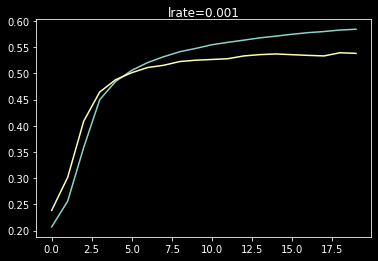

In [27]:
W = 20
learning_rate = 0.001
epochs = 20
batch_size = 1024
column_name ='encoded normalised chords'
input_data = arrange_data(column_name, W, vocab_size)
fit(input_data,learning_rate,epochs,128)        
pyplot.show() 
    

Accuracy in epoch 20 is slightly better that the one with non-normalised data:

Non normalised: loss: 1.5487 - accuracy: 0.5587
Normalised: loss: 1.4577 - accuracy: 0.5843

Additionally, we must take into accont that in non normalised training we trained wilth the whole dataset (no validation split)

**Conclusion**: we will use normalised data

### Batch size 

Previously, we have used a batch size of 128. Lets check with other values. With 1024: stuck. With 32: too slow

For Data: encoded normalised chords. W=20
Each X has a length of 20
Each Y has a length of 805
len(X)=315340
len(Y)=315340
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 20)            16100     
_________________________________________________________________
lstm_11 (LSTM)               (None, 20, 50)            14200     
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 805)               41055     
Total params: 94,105
Trainable params: 94,105
Non-trainable params: 0
___________________________________________________________

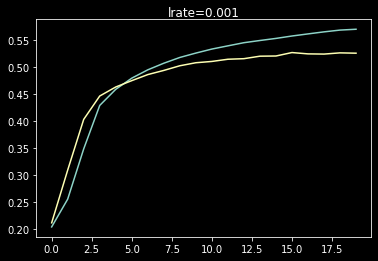

In [37]:
W = 20
learning_rate = 0.001
epochs = 20
batch_size = 256
column_name ='encoded normalised chords'
input_data = arrange_data(column_name, W, vocab_size)
fit(input_data,learning_rate,epochs,batch_size)        
pyplot.show() 

The accuracy is lower than in 128 batch size and it is slower. We will use 128.

### W

For Data: encoded normalised chords. W=10
Each X has a length of 10
Each Y has a length of 805
len(X)=360562
len(Y)=360562
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 10, 10)            8050      
_________________________________________________________________
lstm_17 (LSTM)               (None, 10, 50)            12200     
_________________________________________________________________
lstm_18 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 805)               41055     
Total params: 84,055
Trainable params: 84,055
Non-trainable params: 0
___________________________________________________________

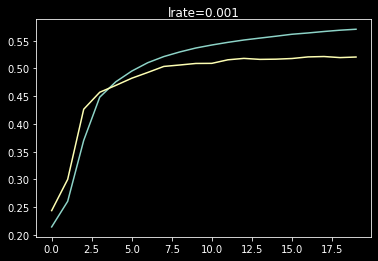

In [40]:
W = 10
learning_rate = 0.001
epochs = 20
batch_size = 128
column_name ='encoded normalised chords'
input_data = arrange_data(column_name, W, vocab_size)
fit(input_data,learning_rate,epochs,batch_size)        
pyplot.show() 

We cannot see much difference between W 10 and 20. 

### Learning rates 

In [48]:
learning_rates = [0.01, 0.001] # we discard 0.1 since from epoch 2 it stucks.

For Data: encoded normalised chords. W=20
Each X has a length of 20
Each Y has a length of 805
len(X)=315340
len(Y)=315340
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 20, 20)            16100     
_________________________________________________________________
lstm_23 (LSTM)               (None, 20, 50)            14200     
_________________________________________________________________
lstm_24 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_23 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_24 (Dense)             (None, 805)               41055     
Total params: 94,105
Trainable params: 94,105
Non-trainable params: 0
__________________________________________________________

283806/283806 [==============================] - 61s 213us/step - loss: 1.5365 - accuracy: 0.5660 - val_loss: 1.8763 - val_accuracy: 0.5199

Epoch 00026: loss improved from 1.54033 to 1.53653, saving model to ../models/lstm_normalised__W_20_lr_0_01_epochs=50_batch_128.h5
Epoch 27/50
283806/283806 [==============================] - 61s 214us/step - loss: 1.5355 - accuracy: 0.5667 - val_loss: 1.8740 - val_accuracy: 0.5175

Epoch 00027: loss improved from 1.53653 to 1.53549, saving model to ../models/lstm_normalised__W_20_lr_0_01_epochs=50_batch_128.h5
Epoch 28/50
283806/283806 [==============================] - 62s 218us/step - loss: 1.5336 - accuracy: 0.5674 - val_loss: 1.8843 - val_accuracy: 0.5166

Epoch 00028: loss improved from 1.53549 to 1.53355, saving model to ../models/lstm_normalised__W_20_lr_0_01_epochs=50_batch_128.h5
Epoch 29/50
283806/283806 [==============================] - 60s 211us/step - loss: 1.5277 - accuracy: 0.5676 - val_loss: 1.8872 - val_accuracy: 0.5147

Epoch 0

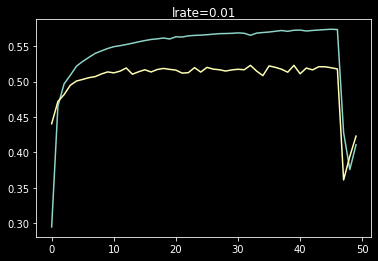

For Data: encoded normalised chords. W=20
Each X has a length of 20
Each Y has a length of 805
len(X)=315340
len(Y)=315340
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 20, 20)            16100     
_________________________________________________________________
lstm_25 (LSTM)               (None, 20, 50)            14200     
_________________________________________________________________
lstm_26 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_25 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_26 (Dense)             (None, 805)               41055     
Total params: 94,105
Trainable params: 94,105
Non-trainable params: 0
__________________________________________________________

283806/283806 [==============================] - 66s 232us/step - loss: 1.4103 - accuracy: 0.5953 - val_loss: 1.7955 - val_accuracy: 0.5381

Epoch 00025: loss improved from 1.41687 to 1.41026, saving model to ../models/lstm_normalised__W_20_lr_0_001_epochs=50_batch_128.h5
Epoch 26/50
283806/283806 [==============================] - 66s 232us/step - loss: 1.4040 - accuracy: 0.5970 - val_loss: 1.8009 - val_accuracy: 0.5380

Epoch 00026: loss improved from 1.41026 to 1.40402, saving model to ../models/lstm_normalised__W_20_lr_0_001_epochs=50_batch_128.h5
Epoch 27/50
283806/283806 [==============================] - 67s 235us/step - loss: 1.3971 - accuracy: 0.5985 - val_loss: 1.8011 - val_accuracy: 0.5372

Epoch 00027: loss improved from 1.40402 to 1.39714, saving model to ../models/lstm_normalised__W_20_lr_0_001_epochs=50_batch_128.h5
Epoch 28/50
283806/283806 [==============================] - 60s 212us/step - loss: 1.3915 - accuracy: 0.6011 - val_loss: 1.8051 - val_accuracy: 0.5393

Epoc

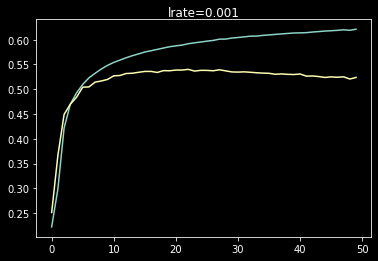

In [49]:
for learning_rate in learning_rates:
    W = 20
    epochs = 50
    batch_size = 128
    column_name ='encoded normalised chords'
    input_data = arrange_data(column_name, W, vocab_size)
    fit(input_data,learning_rate,epochs,batch_size)        
    pyplot.show() 
            


#### Learning rate 0.0005 

For Data: encoded normalised chords. W=20
Each X has a length of 20
Each Y has a length of 805
len(X)=315340
len(Y)=315340
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 20, 20)            16100     
_________________________________________________________________
lstm_27 (LSTM)               (None, 20, 50)            14200     
_________________________________________________________________
lstm_28 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_28 (Dense)             (None, 805)               41055     
Total params: 94,105
Trainable params: 94,105
Non-trainable params: 0
__________________________________________________________

283806/283806 [==============================] - 61s 214us/step - loss: 1.5453 - accuracy: 0.5598 - val_loss: 1.7871 - val_accuracy: 0.5247

Epoch 00025: loss improved from 1.55464 to 1.54531, saving model to ../models/lstm_normalised__W_20_lr_0_0005_epochs=50_batch_128.h5
Epoch 26/50
283806/283806 [==============================] - 60s 213us/step - loss: 1.5360 - accuracy: 0.5617 - val_loss: 1.7891 - val_accuracy: 0.5229

Epoch 00026: loss improved from 1.54531 to 1.53603, saving model to ../models/lstm_normalised__W_20_lr_0_0005_epochs=50_batch_128.h5
Epoch 27/50
283806/283806 [==============================] - 61s 215us/step - loss: 1.5279 - accuracy: 0.5637 - val_loss: 1.7833 - val_accuracy: 0.5303

Epoch 00027: loss improved from 1.53603 to 1.52787, saving model to ../models/lstm_normalised__W_20_lr_0_0005_epochs=50_batch_128.h5
Epoch 28/50
283806/283806 [==============================] - 62s 217us/step - loss: 1.5195 - accuracy: 0.5662 - val_loss: 1.7842 - val_accuracy: 0.5325

E

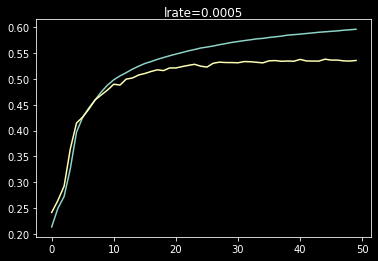

In [50]:
W = 20
epochs = 50
batch_size = 128
column_name ='encoded normalised chords'
input_data = arrange_data(column_name, W, vocab_size)
fit(input_data,0.0005,epochs,batch_size)        
pyplot.show() 